# **TP 1**
## *Effets biologiques des rayonnements. Relation entre la dose et la survie cellulaire*

**Contacts :**

- Verónica Sorgato: [veronica.sorgato88@gmail.com](mailto:veronica.sorgato88@gmail.com)
- Samy Kefs: [samy.kefs@inserm.fr](mailto:samy.kefs@inserm.fr)
- Yannick Arnoud: [yannick.arnoud@lpsc.in2p3.fr](mailto:yannick.arnoud@lpsc.in2p3.fr)

---
## **Context**

La  publication  qui  vous  a  été  fournie  s’interesse  à  deux  lignées  de  cellules  lymphatiques humaines :  WSU-DLCL2  et  SK-DHL2B.  Ces  cellules  ont été  soumises  à  deux  types  d’irradiation. 
D’une part des **photons** (cobalt 60) et d’autre part des **neutrons** rapides. 

---



---
## **Question 1**

 1. Expliquez ce qu'est une courbe de survie.

 ---

---
## **Question 2** 

2. Récupérer  graphiquement  les  valeurs  des  mesures {dose, survie et incertitude sur la survie} et les sauvegarder au format excel.
---

---
## **Question 3**

3. Ouvrir dans python les données excel
---

In [62]:
# Import the required libraries

import pandas as pd 
import numpy as np


In [63]:
# Define the path to the XLSX file created earlier

pathToXLSX= "/Users/samy/Desktop/PhD/TP_Dosimetrie_M2/TP01/Data.xlsx"

In [64]:
# Open the XLSX file and print the sheet names 

myXlsxFile = pd.ExcelFile(pathToXLSX)
print(myXlsxFile.sheet_names)


['Sheet1', 'Sheet2']


In [65]:
# Load each sheet into a list

data_sheets = []
for sheet_name in myXlsxFile.sheet_names:
    
    data = myXlsxFile.parse(sheet_name)
    data_sheets.append(data)
    
data_sheets[1]
    

,Doses proton (Gy),WSU_DLCL2,Incertainties high,Incertainties low,SK2B,Incertainties high2,Incertainties low2
0,0,1.00000,0.0000,0.0000,1.000,0.000,0.000
1,1,0.72000,0.2000,0.2000,0.600,0.100,0.100
2,2,0.50000,0.0900,0.0900,0.400,0.200,0.200
3,3,0.20000,0.1000,0.0100,0.125,0.075,0.075
4,4,0.08000,0.0450,0.0450,0.060,0.040,0.040
5,5,0.01800,0.0100,0.0100,0.020,0.010,0.010
6,6,NaN,NaN,NaN,0.005,0.005,0.005
7,8,0.00056,0.0005,0.0005,0.004,0.003,0.003


In [66]:
data_sheets[0]

,Doses Neutron (Gy),WSU_DLCL2,Incertainties high,Incertainties low,SK2B,Incertainties high2,Incertainties low2
0,0.00,1.0000,0.0000,0.0000,1.000,0.0000,0.0000
1,0.25,0.7000,0.1000,0.1000,0.490,0.1000,0.1000
2,0.50,0.5300,0.2000,0.2000,0.330,0.1500,0.1500
3,1.00,0.2500,0.1000,0.1000,0.180,0.0850,0.0850
4,1.50,0.1000,0.0500,0.0500,0.090,0.0350,0.0350
5,2.00,0.0400,0.0200,0.0200,0.040,0.0200,0.0200
6,2.50,0.0065,0.0018,0.0018,0.008,0.0045,0.0045
7,4.00,0.0003,0.0001,0.0001,0.006,0.0040,0.0040


In [67]:
# You can also manually open each sheet

Photon_Sheet= pd.read_excel(pathToXLSX, sheet_name="Sheet2")

Neutron_Sheet= pd.read_excel(pathToXLSX, sheet_name="Sheet1")



## **Reminder**

Pandas returns DataFrames, which are highly practical and powerful for handling Excel files. However, DataFrames can be complex to manipulate and may lead to longer processing times, especially when dealing with large datasets that consume significant memory. 
That's why, in this case, I am converting the data into NumPy arrays.


In [68]:
# Convert the dataFrame to numpy array 
photon_array = Photon_Sheet.to_numpy()
neutron_array = Neutron_Sheet.to_numpy()

photon_array




array([[0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00],
       [1.00e+00, 7.20e-01, 2.00e-01, 2.00e-01, 6.00e-01, 1.00e-01,
        1.00e-01],
       [2.00e+00, 5.00e-01, 9.00e-02, 9.00e-02, 4.00e-01, 2.00e-01,
        2.00e-01],
       [3.00e+00, 2.00e-01, 1.00e-01, 1.00e-02, 1.25e-01, 7.50e-02,
        7.50e-02],
       [4.00e+00, 8.00e-02, 4.50e-02, 4.50e-02, 6.00e-02, 4.00e-02,
        4.00e-02],
       [5.00e+00, 1.80e-02, 1.00e-02, 1.00e-02, 2.00e-02, 1.00e-02,
        1.00e-02],
       [6.00e+00,      nan,      nan,      nan, 5.00e-03, 5.00e-03,
        5.00e-03],
       [8.00e+00, 5.60e-04, 5.00e-04, 5.00e-04, 4.00e-03, 3.00e-03,
        3.00e-03]])

## **Reminder**

Data management and code readability are crucial aspects to avoid errors and, most importantly, to enable others to understand your code.

It all depends on your needs, but using dictionaries can be very practical and efficient for data management.


In [69]:
# It could be relevant to use different array with different names 

photon_Dose = photon_array[:, 0]
neutron_Dose = neutron_array[:, 0]

photon_SKDHL2B = photon_array[:,4]
std_photon_SKDHL2B = photon_array[:, 5]


neutron_SKDHL2B = neutron_array[:,4]
std_neutron_SKDHL2B = neutron_array[:, 5]


photon_array = photon_array[~(np.isnan(photon_array).any(axis=1))]
photon_Dose_WSU_DLCL2 = photon_array[:, 0]

photon_WSU_DLCL2 = photon_array[:, 1]
std_photon_WSU_DLCL2 = photon_array[:, 2]

neutron_WSU_DLCL2 = neutron_array[:, 1]
std_neutron_WSU_DLCL2 = neutron_array[:, 2]




In [70]:
# Best practice to do creat a dictionnary with all data 

dict_Photon = {}
dict_Neutron = {}

for column_names_P in Photon_Sheet.columns:
    dict_Photon[column_names_P]= Photon_Sheet[column_names_P].to_numpy()

for column_names_N in Neutron_Sheet.columns:
    dict_Neutron[column_names_N]= Neutron_Sheet[column_names_N].to_numpy()
    
dict_Neutron

{'Doses Neutron (Gy)': array([0.  , 0.25, 0.5 , 1.  , 1.5 , 2.  , 2.5 , 4.  ]),
 'WSU_DLCL2': array([1.0e+00, 7.0e-01, 5.3e-01, 2.5e-01, 1.0e-01, 4.0e-02, 6.5e-03,
        3.0e-04]),
 'Incertainties high': array([0.0e+00, 1.0e-01, 2.0e-01, 1.0e-01, 5.0e-02, 2.0e-02, 1.8e-03,
        1.0e-04]),
 'Incertainties low': array([0.0e+00, 1.0e-01, 2.0e-01, 1.0e-01, 5.0e-02, 2.0e-02, 1.8e-03,
        1.0e-04]),
 'SK2B': array([1.   , 0.49 , 0.33 , 0.18 , 0.09 , 0.04 , 0.008, 0.006]),
 'Incertainties high2': array([0.    , 0.1   , 0.15  , 0.085 , 0.035 , 0.02  , 0.0045, 0.004 ]),
 'Incertainties low2': array([0.    , 0.1   , 0.15  , 0.085 , 0.035 , 0.02  , 0.0045, 0.004 ])}

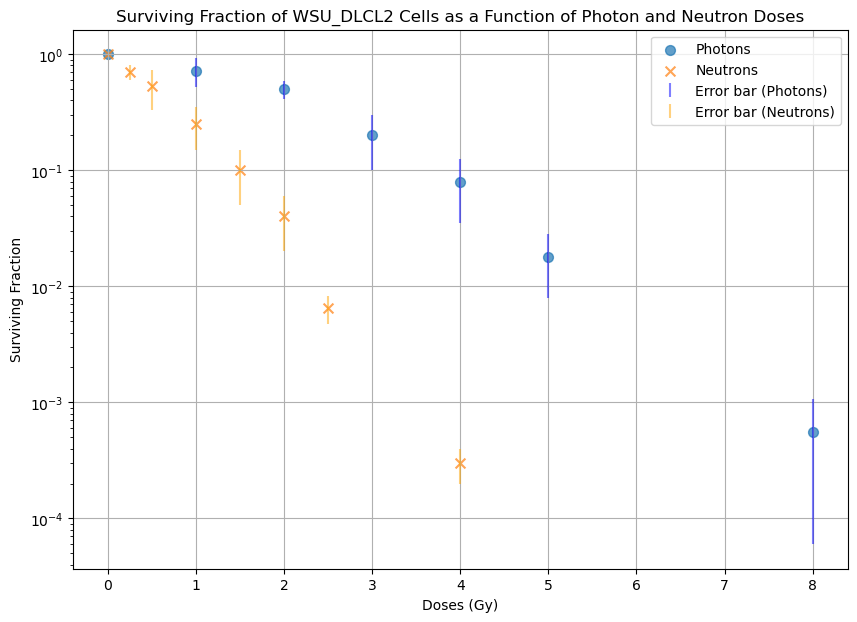

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Plot the first scatter plot
plt.scatter(photon_Dose_WSU_DLCL2, photon_WSU_DLCL2, label="Photons", marker='o', s=50, alpha=0.7)

# Plot the second scatter plot
plt.scatter(neutron_Dose, neutron_WSU_DLCL2, label="Neutrons", marker='x', s=50, alpha=0.7)

# Add error bars
plt.errorbar(photon_Dose_WSU_DLCL2, photon_WSU_DLCL2,
             yerr=std_photon_WSU_DLCL2,
             fmt='none', color='blue', alpha=0.5, label="Error bar (Photons)")

plt.errorbar(neutron_Dose, neutron_WSU_DLCL2,
             yerr=std_neutron_WSU_DLCL2,
             fmt='none', color='orange', alpha=0.5, label="Error bar (Neutrons)")

# Define axis labels
plt.xlabel("Doses (Gy)")
plt.ylabel("Surviving Fraction")

# Set the y-axis scale to logarithmic
plt.yscale('log')

# Graph title
plt.title("Surviving Fraction of WSU_DLCL2 Cells as a Function of Photon and Neutron Doses")

# Add a legend
plt.grid(True)
plt.legend()
plt.show()

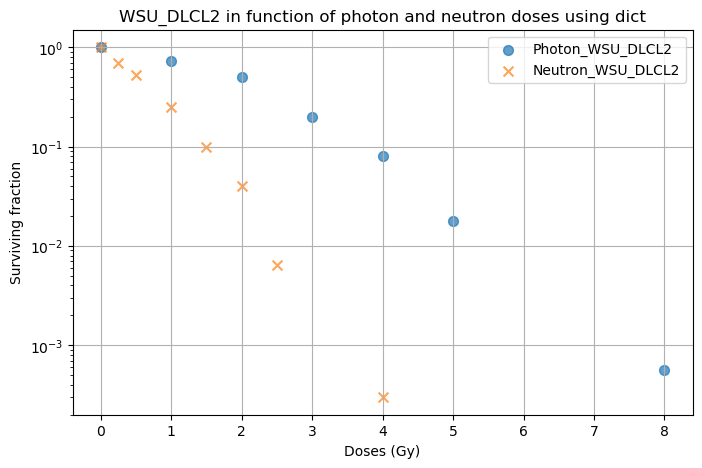

In [72]:
# Do the same thing just using dict 
plt.figure(figsize=(8, 5))

# Plot the first scatter 
plt.scatter(dict_Photon["Doses proton (Gy)"], dict_Photon["WSU_DLCL2"], label="Photon_WSU_DLCL2", marker='o', s=50, alpha=0.7)

# Plot the second one 
plt.scatter(dict_Neutron["Doses Neutron (Gy)"], dict_Neutron["WSU_DLCL2"], label="Neutron_WSU_DLCL2", marker='x', s=50, alpha=0.7)

# add some stuff
plt.xlabel("Doses (Gy)")
plt.ylabel("Surviving fraction")
# put the y scale in log
plt.yscale('log')
plt.title("WSU_DLCL2 in function of photon and neutron doses using dict")


# log scale
plt.yscale('log')
plt.grid(True)
# add a legend
plt.legend()
plt.show()

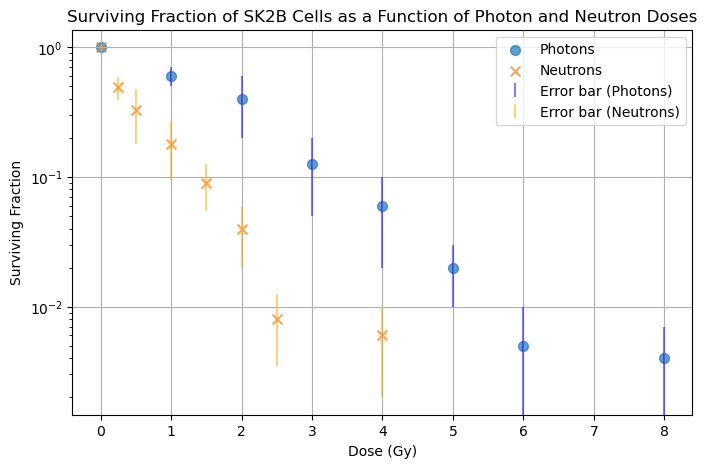

In [73]:
plt.figure(figsize=(8, 5))

# Plot the first scatter plot
plt.scatter(photon_Dose, photon_SKDHL2B, label='Photons', marker='o', s=50, alpha=0.7)

# Plot the second scatter plot
plt.scatter(neutron_Dose, neutron_SKDHL2B, label='Neutrons', marker='x', s=50, alpha=0.7)


plt.errorbar(photon_Dose, photon_SKDHL2B,
             yerr=(std_photon_SKDHL2B), fmt='none', color='blue', alpha=0.5,
             label="Error bar (Photons)")

plt.errorbar(neutron_Dose, neutron_SKDHL2B,
             yerr=std_neutron_SKDHL2B, fmt='none', color='orange', alpha=0.5,
             label="Error bar (Neutrons)")

plt.yscale('log')


plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving Fraction')


plt.title('Surviving Fraction of SK2B Cells as a Function of Photon and Neutron Doses')


plt.legend()
plt.grid(True)
plt.show()


---
## **Question 4**

4. Representé graphiquement la survie des deux types de cellules pour l'irradiation par faisceaux de photon.
---

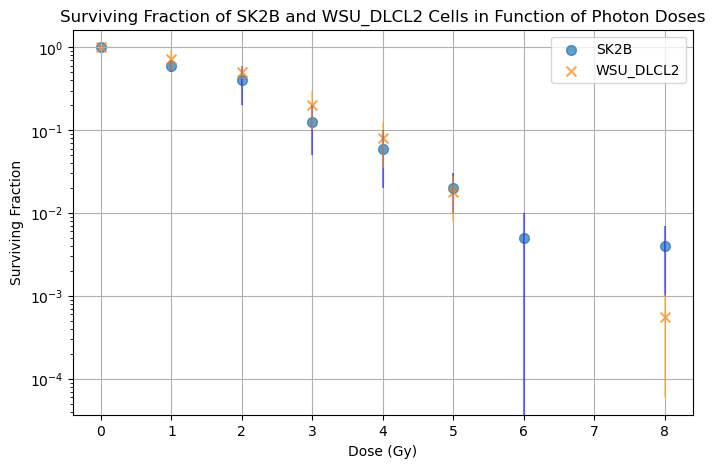

In [74]:
plt.figure(figsize=(8, 5))

# Plot the first scatter plot (SK2B)
plt.scatter(photon_Dose, photon_SKDHL2B, label='SK2B', marker='o', s=50, alpha=0.7)

# Plot the second scatter plot (WSU_DLCL2)
plt.scatter(photon_Dose_WSU_DLCL2, photon_WSU_DLCL2, label='WSU_DLCL2', marker='x', s=50, alpha=0.7)


plt.errorbar(photon_Dose, photon_SKDHL2B,
             yerr=std_photon_SKDHL2B,
             fmt='none', color='blue', alpha=0.5)


plt.errorbar(photon_Dose_WSU_DLCL2, photon_WSU_DLCL2,
             yerr=std_photon_WSU_DLCL2,
             fmt='none', color='orange', alpha=0.5)


plt.yscale('log')


plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving Fraction')


plt.title('Surviving Fraction of SK2B and WSU_DLCL2 Cells in Function of Photon Doses')


plt.legend()
plt.grid(True)
plt.show()

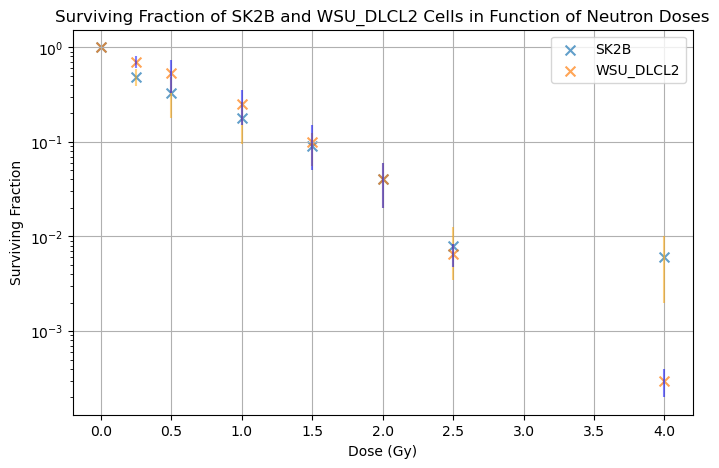

In [75]:
#Do the same thing but the changing the variable in scatter plot function for neutron 

plt.figure(figsize=(8, 5))

# Plot the first scatter plot (SK2B)
plt.scatter(neutron_Dose, neutron_SKDHL2B, label='SK2B', marker='x', s=50, alpha=0.7)

# Plot the second scatter plot (WSU_DLCL2)
plt.scatter(neutron_Dose, neutron_WSU_DLCL2, label="WSU_DLCL2", marker='x', s=50, alpha=0.7)


plt.errorbar(neutron_Dose, neutron_SKDHL2B,
             yerr=std_neutron_SKDHL2B,
             fmt='none', color='orange', alpha=0.5)


plt.errorbar(neutron_Dose, neutron_WSU_DLCL2,
             yerr=std_neutron_WSU_DLCL2,
             fmt='none', color='blue', alpha=0.5)


plt.yscale('log')


plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving Fraction')


plt.title('Surviving Fraction of SK2B and WSU_DLCL2 Cells in Function of Neutron Doses')


plt.legend()
plt.grid(True)
plt.show()

---
## Data Trend Modeling

We will model the data trend using the quadratic linear model: 


$$S = e^{-\alpha \cdot D - \beta \cdot D^2}$$


There are two approaches available: fitting directly with the two-parameter decreasing exponential function or fitting the natural logarithm of survival with a second-order polynomial.



## **Question 6**

6. Ajuster les courbes de survie avec les 2 approches et affichez les graphiquement
---

In [76]:
from scipy.optimize import curve_fit, least_squares

In [77]:
# You have to definie the model for the fitting 
# in our case we have to fit whith two different model 

def quadratic_model(Dose,a,b):
    return -(a*Dose)-(b*(Dose**2))

def exponential_model(Dose,a,b):
    return np.exp(-((a*Dose)+(b*(Dose**2))))



In [78]:
a = np.arange(0, 5, 1)
print(a)
b = a
print(b)
b[1]=0
print(b)
print(a)
b = np.copy(a)
print(b) 
b[4] = 0
print(b)
print(a)

[0 1 2 3 4]
[0 1 2 3 4]
[0 0 2 3 4]
[0 0 2 3 4]
[0 0 2 3 4]
[0 0 2 3 0]
[0 0 2 3 4]


### Passage en log des differentes matrices 
### Calcule des differents fit a réaliser 

In [94]:
# Now we have to fit our data, first with the quadratic model 

# Transforming data to logarithmic scale
photon_SKDHL2B_log = np.log(np.copy(photon_SKDHL2B))
std_photon_SKDHL2B_log = np.log(np.copy(std_photon_SKDHL2B))
photon_WSU_DLCL2_log = np.log(np.copy(photon_WSU_DLCL2))
std_photon_WSU_DLCL2_log = np.log(std_photon_WSU_DLCL2)

neutron_SKDHL2B_log = np.log(np.copy(neutron_SKDHL2B))
std_neutron_SKDHL2B_log = np.log(np.copy(std_neutron_SKDHL2B))
neutron_WSU_DLCL2_log = np.log(np.copy(neutron_WSU_DLCL2))
std_neutron_WSU_DLCL2_log = np.log(np.copy(std_neutron_WSU_DLCL2))

# Fitting the data with the quadratic model using curve_fit

parameters_Quad_Photon_WSU_DLCL2, cov_Photon_Quad_WSU_DLCL2 = curve_fit(quadratic_model,
                                                                        photon_Dose_WSU_DLCL2,photon_WSU_DLCL2_log,
                                                                        bounds=([0,0],[np.inf,np.inf])
                                                                        )
print(parameters_Quad_Photon_WSU_DLCL2)

parameters_Quad_Photon_SK2B, cov_Photon_Quad_SK2B = curve_fit(quadratic_model,
                                                              photon_Dose,photon_SKDHL2B_log,
                                                              sigma=std_photon_SKDHL2B_log,
                                                              bounds=([0,0],[np.inf,np.inf]))

parameters_Quad_Neutron_WSU_DLCL2, cov_Quad_Neutron_WSU_DLCL2 = curve_fit(quadratic_model,
                                                                          neutron_Dose,neutron_WSU_DLCL2_log,
                                                                          bounds=([0,0],[np.inf,np.inf])
                                                                          )

parameters_Quad_Neutron_SK2B, cov_Quad_Neutron_SK2B = curve_fit(quadratic_model,
                                                                neutron_Dose,neutron_SKDHL2B_log,
                                                                sigma=std_neutron_SKDHL2B_log,
                                                                bounds=([0,0],[np.inf,np.inf]))
print(parameters_Quad_Neutron_SK2B)
                                                               
                                                                



print(parameters_Quad_Photon_SK2B)

[0.33703202 0.0766984 ]
[1.58791674e+00 4.45901397e-12]
[0.52679943 0.03444176]


In [53]:
# Create a matrix 'm' by stacking two arrays along the last axis
m = np.stack((-photon_Dose_WSU_DLCL2, -photon_Dose_WSU_DLCL2**2), axis=-1)
# Perform a least-squares linear regression using 'm' as the design matrix
result = np.linalg.lstsq(m, photon_WSU_DLCL2_log)
# Print the parameters
print(result)

(array([0.33703202, 0.0766984 ]), array([0.28675881]), 2, array([71.98802813,  3.42400436]))


/var/folders/0_/k993vz617nqfl4vy722j5c8c0000gn/T/ipykernel_17599/1213533804.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result = np.linalg.lstsq(m, photon_WSU_DLCL2_log)


In [95]:
# measure of how well the quadratic model fits the 'photon_WSU_DLCL2_log' data
((photon_WSU_DLCL2_log - quadratic_model(photon_Dose_WSU_DLCL2, *parameters_Quad_Photon_WSU_DLCL2))**2).sum()

0.2867588141523155

In [96]:
%timeit np.linalg.lstsq(m, photon_WSU_DLCL2_log)
%timeit parameters_Quad_Photon_WSU_DLCL2, cov_Photon_Quad_WSU_DLCL2 = curve_fit(quadratic_model, photon_Dose_WSU_DLCL2,photon_WSU_DLCL2_log)


<magic-timeit>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


5.67 µs ± 96.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
77.5 µs ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


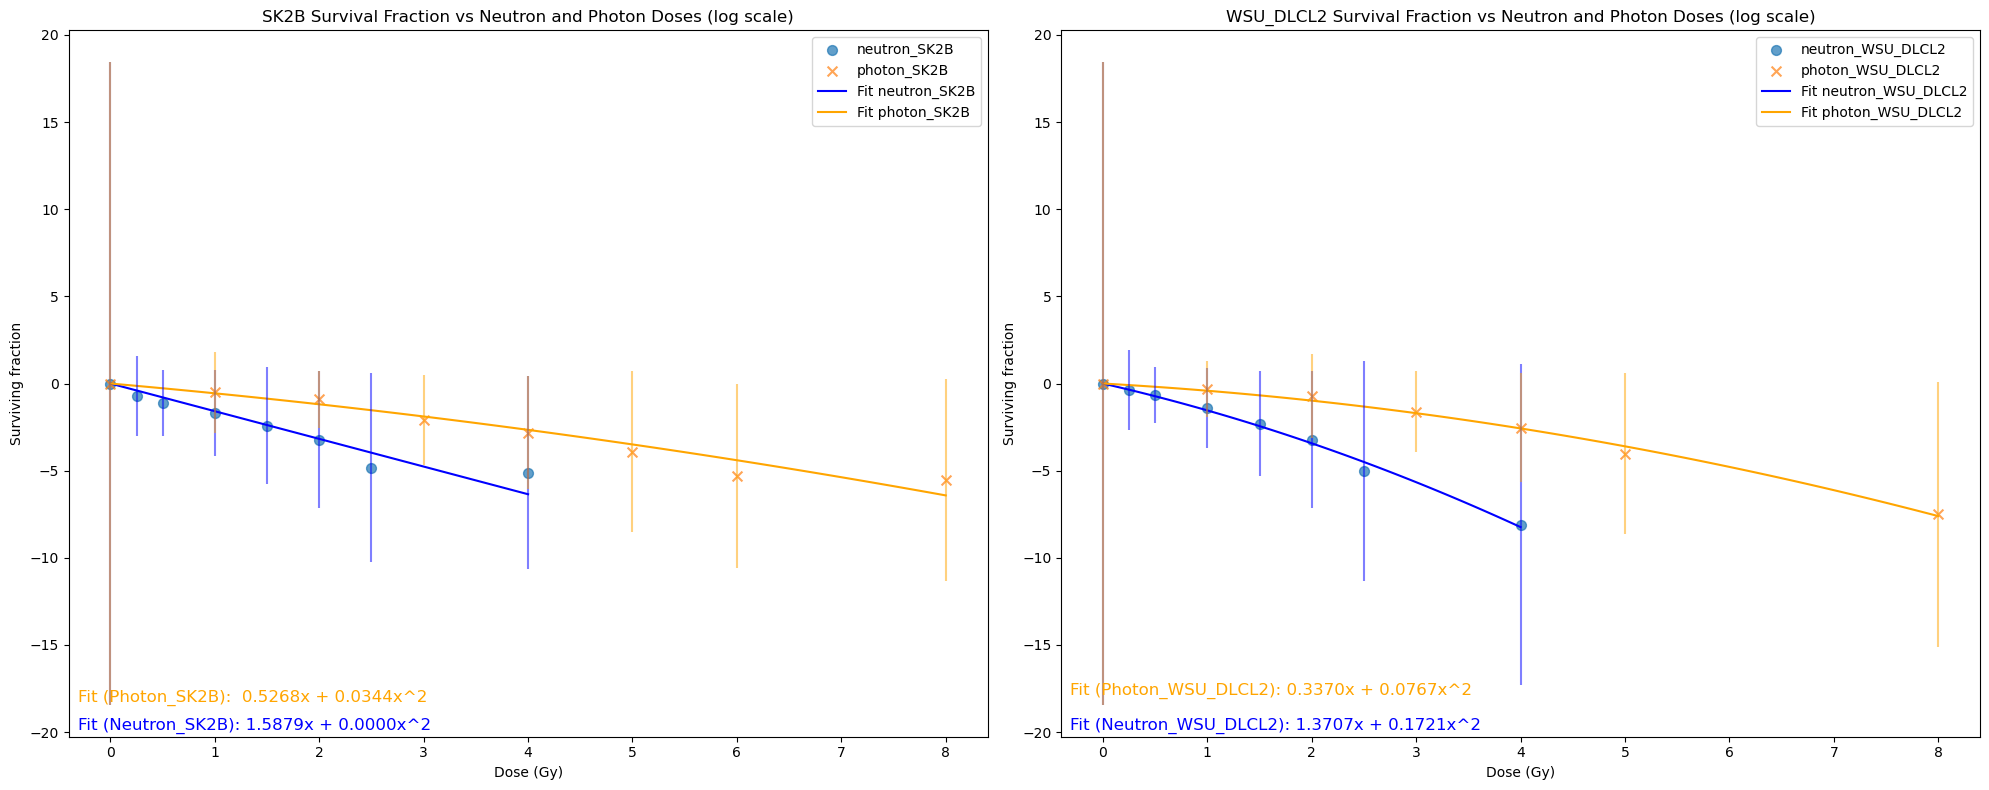

In [97]:
# Plot it 

plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.scatter(neutron_Dose, neutron_SKDHL2B_log, label='neutron_SK2B', marker='o', s=50, alpha=0.7)
plt.scatter(photon_Dose, photon_SKDHL2B_log, label='photon_SK2B', marker='x', s=50, alpha=0.7)


#plt.yscale('log')
plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving fraction')
plt.title('SK2B Survival Fraction vs Neutron and Photon Doses (log scale)')

x_range_photon = np.linspace(np.min(photon_Dose), np.max(photon_Dose), 100)
x_range_neutron = np.linspace(np.min(neutron_Dose),np.max(neutron_Dose),100)
plt.plot(x_range_neutron , quadratic_model(x_range_neutron , *parameters_Quad_Neutron_SK2B), label='Fit neutron_SK2B', color='blue')
plt.plot(x_range_photon, quadratic_model(x_range_photon, *parameters_Quad_Photon_SK2B), label='Fit photon_SK2B', color='orange')

# Fit equation for SK2B - Neutrons
fit_eq_neutron_SK2B = f"Fit (Neutron_SK2B): {parameters_Quad_Neutron_SK2B[0]:.4f}x + {parameters_Quad_Neutron_SK2B[1]:.4f}x^2"
plt.text(0.01, 0.01, fit_eq_neutron_SK2B, transform=plt.gca().transAxes, fontsize=12, color='blue')

# Fit equation for SK2B - Photons
fit_eq_photon_SK2B = f"Fit (Photon_SK2B):  {parameters_Quad_Photon_SK2B[0]:.4f}x + {parameters_Quad_Photon_SK2B[1]:.4f}x^2"
plt.text(0.01, 0.05, fit_eq_photon_SK2B, transform=plt.gca().transAxes, fontsize=12, color='orange')


plt.errorbar(neutron_Dose, neutron_SKDHL2B_log,
             yerr=(np.abs(std_neutron_SKDHL2B_log)),fmt='none',color='blue',alpha=0.5)
plt.errorbar(photon_Dose, photon_SKDHL2B_log,
             yerr=(np.abs(std_photon_SKDHL2B_log)),fmt='none', color='orange',alpha=0.5)

plt.legend()


## Next PLOT ####


plt.subplot(1,2,2)
plt.scatter(neutron_Dose, neutron_WSU_DLCL2_log, label='neutron_WSU_DLCL2', marker='o', s=50, alpha=0.7)
plt.scatter(photon_Dose_WSU_DLCL2, photon_WSU_DLCL2_log, label='photon_WSU_DLCL2', marker='x', s=50, alpha=0.7)


#plt.yscale('log')
plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving fraction')
plt.title('WSU_DLCL2 Survival Fraction vs Neutron and Photon Doses (log scale)')

plt.plot(x_range_neutron , quadratic_model(x_range_neutron , *parameters_Quad_Neutron_WSU_DLCL2), label='Fit neutron_WSU_DLCL2', color='blue')
plt.plot(x_range_photon, quadratic_model(x_range_photon, *parameters_Quad_Photon_WSU_DLCL2), label='Fit photon_WSU_DLCL2', color='orange')

# Fit equation for WSU_DLCL2 - Neutrons
fit_eq_neutron_WSU_DLCL2 = f"Fit (Neutron_WSU_DLCL2): {parameters_Quad_Neutron_WSU_DLCL2[0]:.4f}x + {parameters_Quad_Neutron_WSU_DLCL2[1]:.4f}x^2"
plt.text(0.01, 0.01, fit_eq_neutron_WSU_DLCL2, transform=plt.gca().transAxes, fontsize=12, color='blue')

# Fit equation for WSU_DLCL2 - Photons
fit_eq_photon_WSU_DLCL2 = f"Fit (Photon_WSU_DLCL2): {parameters_Quad_Photon_WSU_DLCL2[0]:.4f}x + {parameters_Quad_Photon_WSU_DLCL2[1]:.4f}x^2"
plt.text(0.01, 0.06, fit_eq_photon_WSU_DLCL2, transform=plt.gca().transAxes, fontsize=12, color='orange')


plt.errorbar(neutron_Dose, neutron_WSU_DLCL2_log,
             yerr=(np.abs(std_neutron_WSU_DLCL2_log)),fmt='none',color='blue',alpha=0.5)
plt.errorbar(photon_Dose_WSU_DLCL2, photon_WSU_DLCL2_log,
             yerr=(np.abs(std_photon_WSU_DLCL2_log)),fmt='none', color='orange',alpha=0.5)

plt.legend()
plt.tight_layout()
plt.show()

### Calcule des fits exponentiels cette fois

In [98]:
# Now with fit with an exponential model 
print(std_photon_WSU_DLCL2)
print(std_photon_WSU_DLCL2 + photon_WSU_DLCL2)
std_photon_WSU_DLCL2[0]=0.00000001
std_photon_SKDHL2B[0]=0.00000001
std_neutron_WSU_DLCL2[0]=0.00000001
std_neutron_SKDHL2B[0]=0.00000001
parameters_exp_Photon_WSU_DLCL2, cov_Photon_exp_WSU_DLCL2 = curve_fit(exponential_model,
                                                                        photon_Dose_WSU_DLCL2,photon_WSU_DLCL2,
                                                                        bounds=([0,0],[2,2]))
                                                                        

parameters_exp_Photon_SK2B, cov_Photon_exp_SK2B = curve_fit(exponential_model,
                                                              photon_Dose,photon_SKDHL2B,
                                                              sigma= std_photon_SKDHL2B,
                                                              bounds=([0,0],[np.inf,np.inf]))
                                                              

parameters_exp_Neutron_WSU_DLCL2, cov_exp_Neutron_WSU_DLCL2 = curve_fit(exponential_model,
                                                                          neutron_Dose,neutron_WSU_DLCL2,
                                                                          bounds=([0,0],[np.inf,np.inf]))                                                                          

parameters_exp_Neutron_SK2B, cov_exp_Neutron_SK2B = curve_fit(exponential_model,
                                                              neutron_Dose,neutron_SKDHL2B,
                                                              sigma = std_neutron_SKDHL2B,
                                                              bounds=([0,0],[np.inf,np.inf]))


parameters_exp_Photon_SK2B,parameters_exp_Photon_WSU_DLCL2, parameters_exp_Neutron_WSU_DLCL2,parameters_exp_Neutron_SK2B,parameters_Quad_Neutron_SK2B,parameters_Quad_Photon_SK2B

[1.0e-08 2.0e-01 9.0e-02 1.0e-01 4.5e-02 1.0e-02 5.0e-04]
[1.00000001 0.92       0.59       0.3        0.125      0.028
 0.00106   ]


(array([0.44612175, 0.06720343]),
 array([0.17845076, 0.10794441]),
 array([1.24926106, 0.165432  ]),
 array([1.84265658e+00, 1.14607524e-15]),
 array([1.58791674e+00, 4.45901397e-12]),
 array([0.52679943, 0.03444176]))

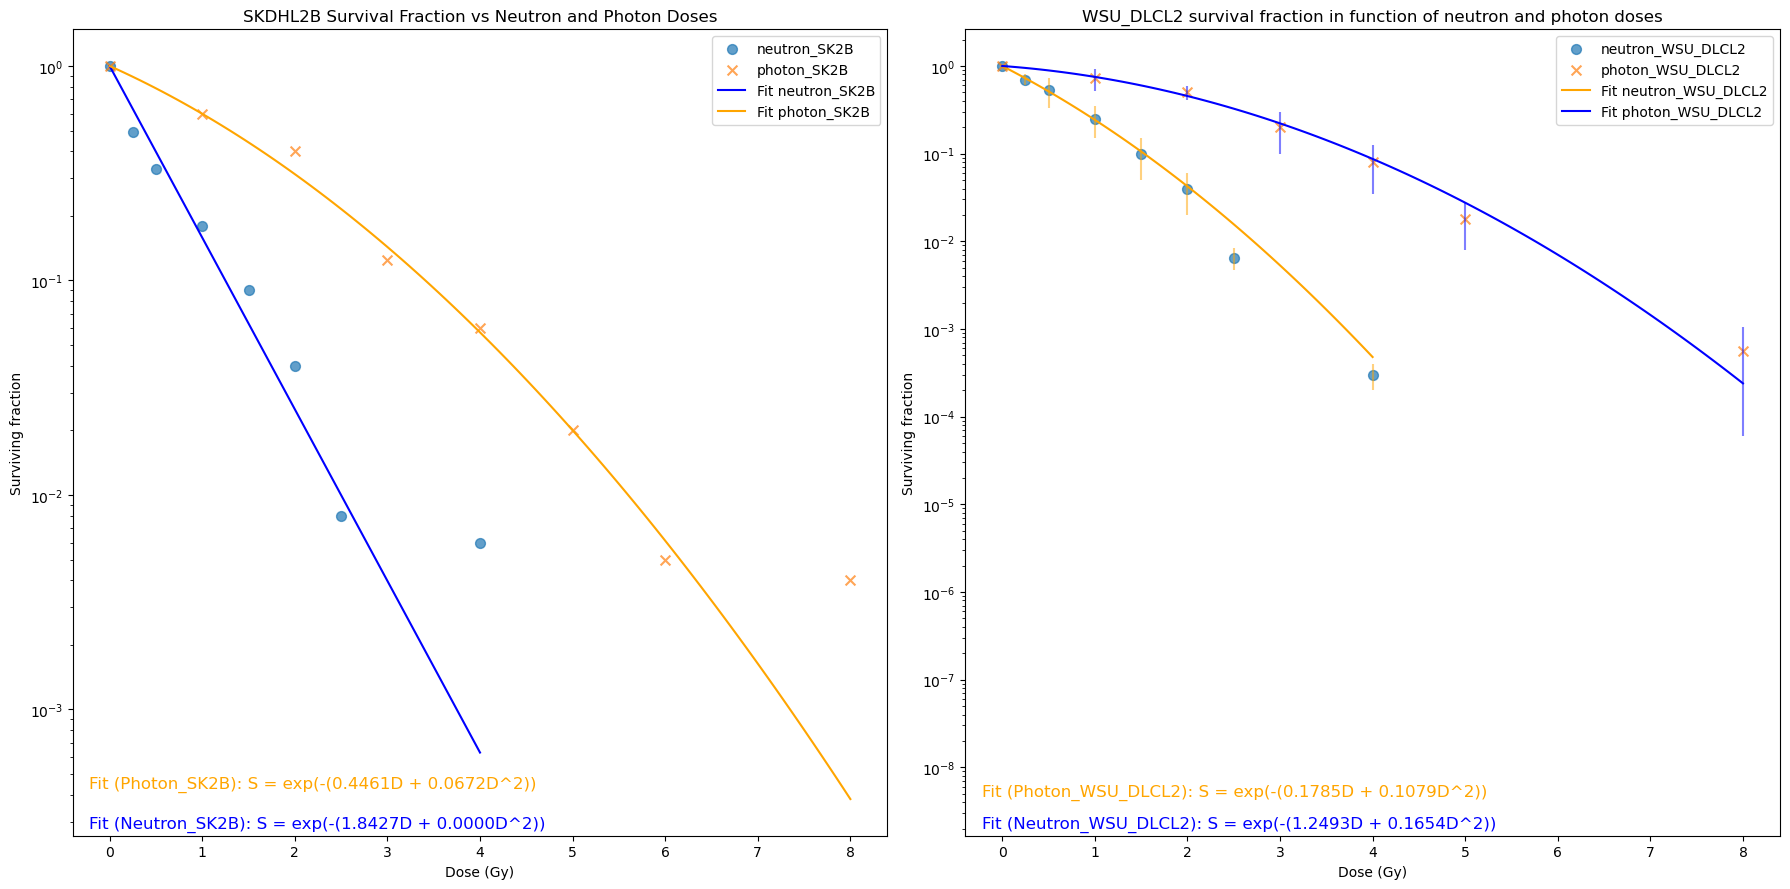

In [99]:
# let see
plt.figure(figsize=(18, 9))
plt.subplot(1,2,1)

plt.scatter(neutron_Dose, neutron_SKDHL2B, label='neutron_SK2B', marker='o', s=50, alpha=0.7)
plt.scatter(photon_Dose, photon_SKDHL2B, label='photon_SK2B', marker='x', s=50, alpha=0.7)

# Fit equations for SK2B
fit_eq_neutron_SK2B = f"Fit (Neutron_SK2B): S = exp(-({parameters_exp_Neutron_SK2B[0]:.4f}D + {parameters_exp_Neutron_SK2B[1]:.4f}D^2))"
fit_eq_photon_SK2B = f"Fit (Photon_SK2B): S = exp(-({parameters_exp_Photon_SK2B[0]:.4f}D + {parameters_exp_Photon_SK2B[1]:.4f}D^2))"

plt.text(0.02, 0.01, fit_eq_neutron_SK2B, transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.02, 0.06, fit_eq_photon_SK2B, transform=plt.gca().transAxes, fontsize=12, color='orange')


plt.yscale('log')
plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving fraction')
plt.title('SKDHL2B Survival Fraction vs Neutron and Photon Doses')

x_range_photon = np.linspace(np.min(photon_Dose), np.max(photon_Dose), 100)
x_range_neutron = np.linspace(np.min(neutron_Dose),np.max(neutron_Dose),100)
plt.plot(x_range_neutron , exponential_model(x_range_neutron , *parameters_exp_Neutron_SK2B), label='Fit neutron_SK2B', color='blue')
plt.plot(x_range_photon, exponential_model(x_range_photon, *parameters_exp_Photon_SK2B), label='Fit photon_SK2B', color='orange')

plt.legend()





## Next PLOT ####





plt.subplot(1,2,2)
plt.scatter(neutron_Dose, neutron_WSU_DLCL2, label='neutron_WSU_DLCL2', marker='o', s=50, alpha=0.7)
plt.scatter(photon_Dose_WSU_DLCL2, photon_WSU_DLCL2, label='photon_WSU_DLCL2', marker='x', s=50, alpha=0.7)

# Fit equations for WSU_DLCL2
fit_eq_neutron_WSU_DLCL2 = f"Fit (Neutron_WSU_DLCL2): S = exp(-({parameters_exp_Neutron_WSU_DLCL2[0]:.4f}D + {parameters_exp_Neutron_WSU_DLCL2[1]:.4f}D^2))"
fit_eq_photon_WSU_DLCL2 = f"Fit (Photon_WSU_DLCL2): S = exp(-({parameters_exp_Photon_WSU_DLCL2[0]:.4f}D + {parameters_exp_Photon_WSU_DLCL2[1]:.4f}D^2))"

plt.yscale('log')
plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving fraction')
plt.title('WSU_DLCL2 survival fraction in function of neutron and photon doses')

plt.plot(x_range_neutron , exponential_model(x_range_neutron , *parameters_exp_Neutron_WSU_DLCL2), label='Fit neutron_WSU_DLCL2', color='orange')
plt.plot(x_range_photon, exponential_model(x_range_photon, *parameters_exp_Photon_WSU_DLCL2), label='Fit photon_WSU_DLCL2', color='blue')

plt.text(0.02, 0.01, fit_eq_neutron_WSU_DLCL2, transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.02, 0.05, fit_eq_photon_WSU_DLCL2, transform=plt.gca().transAxes, fontsize=12, color='orange')


plt.errorbar(photon_Dose_WSU_DLCL2, photon_WSU_DLCL2,
             yerr=(std_photon_WSU_DLCL2),
             fmt='none', color='blue', alpha=0.5)

plt.errorbar(neutron_Dose, neutron_WSU_DLCL2,
             yerr=(std_neutron_WSU_DLCL2),
             fmt= 'none', color='orange', alpha=0.5)

plt.legend()
plt.tight_layout()
plt.show()

---
## **Question 7**
 
 7. Comparer les paramétres et la precisions obtenue

---

In [100]:
# Define dictionaries to store parameters for different datasets and models

Alpha_exp={
    'Photon WSU_DLCL2': [0.18,parameters_exp_Photon_WSU_DLCL2[0],parameters_Quad_Photon_WSU_DLCL2[0]],
    'Neutron WSU_DLCL2': [1.20,parameters_exp_Neutron_WSU_DLCL2[0],parameters_Quad_Neutron_WSU_DLCL2[0]],
    'Photon SKDHL2B': [0.43,parameters_exp_Photon_SK2B[0],parameters_Quad_Photon_SK2B[0]],
    'Neutron SKDHL2B': [2.43,parameters_exp_Neutron_SK2B[0],parameters_Quad_Neutron_SK2B[0]],
}

Beta_exp={
    'Photon WSU_DLCL2': [0.11,parameters_exp_Photon_WSU_DLCL2[1],parameters_Quad_Photon_WSU_DLCL2[1]],
    'Neutron WSU_DLCL2': [0.22,parameters_exp_Neutron_WSU_DLCL2[1],parameters_Quad_Neutron_WSU_DLCL2[1]],
    'Photon SKDHL2B': [0.05,parameters_exp_Photon_SK2B[1],parameters_Quad_Photon_SK2B[1]],
    'Neutron SKDHL2B': [0,parameters_exp_Neutron_SK2B[1],parameters_Quad_Neutron_SK2B[1]],
}
Alpha_exp,Beta_exp

({'Photon WSU_DLCL2': [0.18, 0.17845075711363054, 0.3370320200259621],
  'Neutron WSU_DLCL2': [1.2, 1.2492610609517822, 1.370659675530322],
  'Photon SKDHL2B': [0.43, 0.4461217462423061, 0.5267994272207064],
  'Neutron SKDHL2B': [2.43, 1.8426565789036782, 1.5879167447716642]},
 {'Photon WSU_DLCL2': [0.11, 0.10794440998867921, 0.07669840455746031],
  'Neutron WSU_DLCL2': [0.22, 0.1654320015913872, 0.17211230144300577],
  'Photon SKDHL2B': [0.05, 0.06720342881790944, 0.03444175552894422],
  'Neutron SKDHL2B': [0, 1.146075238379888e-15, 4.459013973583899e-12]})

In [101]:
import tabulate as tb
def comparison(name,dict):
    result = []
    for keys, values in dict.items():
        result.append([keys,values[0],values[2],values[1],round((values[0]-values[2])/values[0],3),round((values[0]-values[1])/values[0],3)])
    return result

print (' Table for Alpha ')
print(tb.tabulate(comparison('alpha',Alpha_exp), headers=['Cell line','Publication' ,'Quadratic Value','Exponential value', 'Quadratic difference ', 'Exponential difference '], tablefmt='fancy_outline'),'\n\n')
print (' Table for Beta ')
print(tb.tabulate(comparison('beta',Beta_exp), headers=['Cell line','Publication', 'Quadratic Value','Exponential value', 'Quadratic difference ', 'Exponential difference '], tablefmt='fancy_outline'))       

    

 Table for Alpha 
╒═══════════════════╤═══════════════╤═══════════════════╤═════════════════════╤═════════════════════════╤═══════════════════════════╕
│ Cell line         │   Publication │   Quadratic Value │   Exponential value │   Quadratic difference  │   Exponential difference  │
╞═══════════════════╪═══════════════╪═══════════════════╪═════════════════════╪═════════════════════════╪═══════════════════════════╡
│ Photon WSU_DLCL2  │          0.18 │          0.337032 │            0.178451 │                  -0.872 │                     0.009 │
│ Neutron WSU_DLCL2 │          1.2  │          1.37066  │            1.24926  │                  -0.142 │                    -0.041 │
│ Photon SKDHL2B    │          0.43 │          0.526799 │            0.446122 │                  -0.225 │                    -0.037 │
│ Neutron SKDHL2B   │          2.43 │          1.58792  │            1.84266  │                   0.347 │                     0.242 │
╘═══════════════════╧═══════════════╧═══════

/var/folders/0_/k993vz617nqfl4vy722j5c8c0000gn/T/ipykernel_17599/2703005674.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  result.append([keys,values[0],values[2],values[1],round((values[0]-values[2])/values[0],3),round((values[0]-values[1])/values[0],3)])


---
## **Question 9** 

9. Evaluer la qualité de votre fit avec la valeur du $\chi^{2}$

#### **Pour rappel :**

\begin{equation}
\chi^2 = \sum \frac{{(observed - expected)^2}}{{expected}}
\end{equation}
---

In [42]:
Photon1={
    
    'Photon SKDHL2B': [parameters_exp_Photon_SK2B[0],parameters_exp_Photon_SK2B[1],parameters_Quad_Photon_SK2B[0],parameters_Quad_Photon_SK2B[1],photon_SKDHL2B],
}
Photon2={
    'Photon WSU_DLCL2': [parameters_exp_Photon_WSU_DLCL2[0],parameters_exp_Photon_WSU_DLCL2[1],parameters_Quad_Photon_WSU_DLCL2[0],parameters_Quad_Photon_WSU_DLCL2[1],photon_WSU_DLCL2],
    
}

Neutron={
    'Neutron WSU_DLCL2': [parameters_exp_Neutron_WSU_DLCL2[0],parameters_exp_Neutron_WSU_DLCL2[1],parameters_Quad_Neutron_WSU_DLCL2[0],parameters_Quad_Neutron_WSU_DLCL2[1],neutron_WSU_DLCL2],
    'Neutron SKDHL2B': [parameters_exp_Neutron_SK2B[0],parameters_exp_Neutron_SK2B[1],parameters_Quad_Neutron_SK2B[0],parameters_Quad_Neutron_SK2B[1],neutron_SKDHL2B],
}

In [ ]:
import tabulate as tb

def chi_sqrt(dose, dict):
    result = []
    for keys,values in dict.items():
        degrees_Lib = dose.shape[0]-2
        
        residual_Quad = quadratic_model(dose,values[2],values[3]) - np.log(values[4])
        chi2_Quad = np.sum(np.nan_to_num((residual_Quad**2)/np.abs((np.log(values[4])))))
        
        
        residual_Exp = (exponential_model(dose,values[0],values[1]))- values[4]
        chi2_Exp = np.sum((residual_Exp**2)/values[4])
        
        chi2_Exp_reduced = chi2_Exp/degrees_Lib
        chi2_Quad_reduced = chi2_Quad/degrees_Lib
        
        
        
        print( f" {keys} Chi2 reduced : Exp = {chi2_Exp_reduced} , Quad : {chi2_Quad_reduced}")
        result.append([keys,chi2_Exp_reduced,chi2_Quad_reduced])
    return result
       
table = chi_sqrt(neutron_Dose,Neutron)

table.append(np.array(chi_sqrt(photon_Dose,Photon1)).flatten())

table.append(np.array(chi_sqrt(photon_Dose_WSU_DLCL2,Photon2)).flatten())


print("\n\n",tb.tabulate(table, headers=['Name', 'Chi2 reduced Exp', 'Chi2 reduced Quad'], tablefmt='fancy_outline'))
        
    
        

---
## **Question 10** 

10. Calculez le rapport 𝛼/𝛽 et l’incertitude associée grâce à la matrice de covariance pour chaque type d’irradiation et de lignée cellulaire.**

### **Pour rappel** 


\begin{equation}
    \sigma^2_{\frac{\alpha}{\beta}}=\left(\frac{\partial_{\frac{\alpha}{\beta}}}{\partial_{\alpha}}\right)^2  \sigma^2_{\alpha}+
    \left(\frac{\partial_{\frac{\alpha}{\beta}}}{\partial_{\alpha}}\right) \left(\frac{\partial_{\frac{\alpha}{\beta}}}{\partial_{\beta}}\right) \sigma^2_{\alpha\beta}+
    \left(\frac{\partial_{\frac{\alpha}{\beta}}}{\partial_{\alpha}}\right) \left(\frac{\partial_{\frac{\alpha}{\beta}}}{\partial_{\beta}}\right) \sigma^2_{\beta\alpha}+
    \left(\frac{\partial_{\frac{\alpha}{\beta}}}{\partial_{\beta}}\right)^2  \sigma^2_{\beta}
\end{equation}

 Dans notre cas nous avons seulement la matrice de covariance
$$
    \begin{pmatrix}
        \sigma^2_{\alpha} & \sigma_{\alpha\beta}\\
        \sigma_{\beta\alpha} & \sigma^2_{\beta}
    \end{pmatrix}
$$

Nous allons donc utilisé les produits matriciels en utilisant la matrice de covariance 

\begin{equation}
    \sigma^2_{\frac{\alpha}{\beta}}= 
    \begin{pmatrix}
        \frac{\partial_{\frac{\alpha}{\beta}}}{\partial_{\alpha}} & \frac{\partial_{\frac{\alpha}{\beta}}}{\partial_{\beta}}
    \end{pmatrix}
    \begin{pmatrix}
        \sigma^2_{\alpha} & \sigma_{\alpha\beta}\\
        \sigma_{\beta\alpha} & \sigma^2_{\beta}
    \end{pmatrix}
    \begin{pmatrix}
        \frac{\partial_{\frac{\alpha}{\beta}}}{\partial_{\alpha}} \\ \frac{\partial_{\frac{\alpha}{\beta}}}{\partial_{\beta}}
    \end{pmatrix}
\end{equation}


Dérivée partielle par rapport à $\alpha$

$$
\frac{\partial}{\partial \alpha} \left(\frac{\alpha}{\beta}\right) = \frac{1}{\beta} \cdot \frac{\partial}{\partial \alpha} (\alpha) = \frac{1}{\beta}
$$

Dérivée partielle par rapport à $\beta$

$$
\frac{\partial}{\partial \beta} \left(\frac{\alpha}{\beta}\right) = \alpha \cdot \frac{\partial}{\partial \beta} \left(\frac{1}{\beta}\right) = -\frac{\alpha}{\beta^2}
$$
---

In [ ]:
param={
    'Photon WSU_DLCL2 exponential': [parameters_exp_Photon_WSU_DLCL2[0],parameters_exp_Photon_WSU_DLCL2[1],cov_Photon_exp_WSU_DLCL2],
    'Photon WSU_DLCL2 quadratic': [parameters_Quad_Photon_WSU_DLCL2[0],parameters_Quad_Photon_WSU_DLCL2[1],cov_Photon_Quad_WSU_DLCL2],
    'Photon SKDHL2B exponential': [parameters_exp_Photon_SK2B[0],parameters_exp_Photon_SK2B[1],cov_Photon_exp_SK2B],
    'Photon SKDHL2B quadratic': [parameters_Quad_Photon_SK2B[0],parameters_Quad_Photon_SK2B[1],cov_Photon_Quad_SK2B],
    'Neutron WSU_DLCL2 exponential': [parameters_exp_Neutron_WSU_DLCL2[0],parameters_exp_Neutron_WSU_DLCL2[1],cov_exp_Neutron_WSU_DLCL2],
    'Neutron WSU_DLCL2 quadratic': [parameters_Quad_Neutron_WSU_DLCL2[0],parameters_Quad_Neutron_WSU_DLCL2[1],cov_Quad_Neutron_SK2B],
    'Neutron SKDHL2B exponential': [parameters_exp_Neutron_SK2B[0],parameters_exp_Neutron_SK2B[1],cov_exp_Neutron_SK2B],
    'Neutron SKDHL2B Quadratic ': [parameters_Quad_Neutron_SK2B[0],parameters_Quad_Neutron_SK2B[1],cov_Quad_Neutron_SK2B],
    }
param


    
    

In [ ]:
def incertitude(dict):
    result=[]
    for keys, values in dict.items():
        
        derivative = []
        derivative.append(1/values[1])
        derivative.append(values[0]/(values[1]**2))
        derivative= np.asarray(derivative)
        std_variance = np.sqrt(np.dot(derivative,np.dot(values[2],derivative.T)))
        result.append([keys,values[0],values[1], values[0]/values[1] ,std_variance])
        print(f'{"α"}/ {"β"} : {values[0]/values[1]}, standard deviation of {keys} : {std_variance}')
    return result
print("\n\n",tb.tabulate(incertitude(param), headers=['Name', 'α', 'β','α/β','Standard deviation'], tablefmt='fancy_outline'))

---
## **Question 12**

On considère la lignée cellulaire WSU-DLCL2. À partir des courbes de survie cellulaire obtenues à la question 6, déterminer par interpolation la dose à appliquer avec des photons, puis des neutrons, pour avoir l’effet biologique suivant :

* 1 % de survie
* 10 % de survie
* 50 % de survie
* 80 % de survie
* 90 % de survie

---



In [ ]:
# for solving the equation there is differents methode 
import math
from scipy import roots

def solve_quadratic_equation(a, b, c):
    # Calculate the discriminant
    discriminant = b**2 - 4*a*c
    
    # Check the discriminant
    if discriminant > 0:
        # Two distinct real solutions
        x1 = (-b + math.sqrt(discriminant)) / (2*a)
        x2 = (-b - math.sqrt(discriminant)) / (2*a)
        if x1 >=0 and x2>=0:
            return np.array([x1,x2])
        elif x1 >=0 and x2<=0:
            return np.array([x1])
        else:
            return np.array([x2])
    elif discriminant == 0:
        # One real solution (double root)
        x = -b / (2*a)
        return x,
    else:
        # No real solution (complex solutions)
        real_part = -b / (2*a)
        imaginary_part = math.sqrt(abs(discriminant)) / (2*a)
        solution1 = complex(real_part, imaginary_part)
        solution2 = complex(real_part, -imaginary_part)
        return solution1, solution2



def solver (a , b , c):
    return np.roots([a,b,c])

def solver2(a,b,c):
    return roots([a,b,c])
# Example of usage
a = 1
b = -5
c = 3

solutions = solve_quadratic_equation(a, b, c)

print("Solutions of the equation: ", solutions)
solutions = solver(a, b, c)
print("Solutions of the equation: ", solutions)
solutions = solver2(a, b, c)
print("Solutions of the equation: ", solutions)
%timeit solve_quadratic_equation(a, b, c)
%timeit solver(a, b, c)
%timeit solver2(a, b, c)


In [ ]:
# Now we going to use the models with the alpha and betas value to find that 
# We will use the exponential model 

percentage=[0.01,0.1,0.5,0.8,0.9]  
dose_photon = []
dose_neutron = []
for i in percentage:
    sol_photon = solve_quadratic_equation(param["Photon WSU_DLCL2 exponential"][1],param["Photon WSU_DLCL2 exponential"][0],np.log(i))
    sol_neutron = solve_quadratic_equation(param["Neutron WSU_DLCL2 exponential"][1],param["Neutron WSU_DLCL2 exponential"][0],np.log(i))
    print(f"Dose photon for {i} % of survival = {sol_photon}")
    print(f"Dose neutron for {i} % of survival = {sol_neutron}")
    dose_photon.append(sol_photon)
    dose_neutron.append(sol_neutron)

dose_photon = np.asarray(dose_photon)
dose_neutron = np.asarray(dose_neutron)
percentage = np.asarray(percentage)

dose_photon1 = np.asarray(dose_photon)
dose_neutron1 = np.asarray(dose_neutron)
percentage1 = np.asarray(percentage)

print('\n\n',tb.tabulate(np.column_stack((percentage1,dose_photon1,dose_neutron1)), headers=['Percentage', 'Dose photon', 'Dose neutron'], tablefmt='fancy_outline'))
%timeit tb.tabulate(np.column_stack((percentage1,dose_photon1,dose_neutron1)), headers=['Percentage', 'Dose photon', 'Dose neutron'], tablefmt='fancy_outline')

dose_neutron1 = np.asarray(dose_neutron1).flatten()
print('\n\n',tb.tabulate(np.array([percentage1,dose_photon1.flatten(),dose_neutron1.flatten()]).T, headers=['Percentage', 'Dose photon', 'Dose neutron'], tablefmt='fancy_outline'))

%timeit tb.tabulate(np.array([percentage1,dose_photon1.flatten(),dose_neutron1.flatten()]).T, headers=['Percentage', 'Dose photon', 'Dose neutron'], tablefmt='fancy_outline')


---
## **Question 13**

Expliquer ce qu’est l’efficacité biologique relative (EBR en français ou RBE dans la publi

---

**L'efficacité biologique relative (EBR) en radiobiologie**

L'efficacité biologique relative (EBR) est une mesure qui permet de comparer l'effet biologique de deux rayonnements, à doses absorbées égales. Elle est définie comme le rapport de la dose d'un rayonnement de référence qui produit le même effet que la dose d'un rayonnement considéré.

Le rayonnement de référence est généralement un rayonnement à faible énergie, tel que les rayons X ou les rayons gamma, pour lequel l'EBR est de 1.

Les rayonnements à haute énergie, tels que les particules alpha ou les neutrons, ont une EBR supérieure à 1. Cela signifie que, pour une dose absorbée égale, ils produiront un effet biologique plus important.



---
## **Question 14**

14. a- Calculer l’EBR neutrons pour chacune des lignées cellulaires et representez le 
résultat sous forme d’un même graphique.



In [ ]:
# To calculate the RBE we do the ratio of dose gamma and dose neutron for the same survival fraction

RBE = dose_photon/dose_neutron

for p, rbe in zip(percentage, RBE):
    print(f"RBE for {p}% of survival = {rbe}")

print('\n\n',tb.tabulate(np.array([percentage,np.array(RBE).flatten()]).T, headers=['Percentage', 'RBE'], tablefmt='fancy_outline'))


b- Vous tracerez l’EBR des neutrons en fonction de la survie de 1 à 95 % par pas de 1%. 

---

In [ ]:
percentage = np.linspace(0.01,0.95,95)
RBE =[]
for i in percentage:
    sol_photon = solve_quadratic_equation(param["Photon WSU_DLCL2 exponential"][1],param["Photon WSU_DLCL2 exponential"][0],np.log(i))
    sol_neutron = solve_quadratic_equation(param["Neutron WSU_DLCL2 exponential"][1],param["Neutron WSU_DLCL2 exponential"][0],np.log(i))
    RBE.append(sol_photon/sol_neutron)

RBE = np.asarray(RBE)

plt.figure(figsize=(8,5))

plt.plot(percentage,RBE)
plt.xlabel('Survival fraction')
plt.ylabel('RBE')
plt.title('RBE in function of survival fraction for WSU_DLCL2')
plt.grid(True)
plt.show()


---
## **Question 15**

15. En radiobiologie, on peut réaliser un test simple qui ne nécessite pas la réalisation de courbes de survie cellulaires complètes. Il s’agit du calcul du rapport des survies à 2 Gy. Calculer le rapport des survies à 2 Gy dans notre cas. Commenter la pertinence de cet indicateur radiobiologique dans le cas de la comparaison des irradiations neutron et gamma sur ce type de cellules.

---

In [ ]:
photon_2Gy = exponential_model(2,param["Photon WSU_DLCL2 exponential"][0],param["Photon WSU_DLCL2 exponential"][1])
neutron_2Gy = exponential_model(2,param["Neutron WSU_DLCL2 exponential"][0],param["Neutron WSU_DLCL2 exponential"][1])

print(f"Survival fraction for 2 Gy of photon = {photon_2Gy}")
print(f"Survival fraction for 2 Gy of neutron = {neutron_2Gy}")
print(f"Ratio for 2 Gy = {photon_2Gy/neutron_2Gy}",'\n\n')
ratio_2Gy = np.asarray(photon_2Gy/neutron_2Gy)

print(tb.tabulate(np.array([[photon_2Gy],[neutron_2Gy],[ratio_2Gy]]).T, headers=['Survival fraction for 2 Gy of photon','Survival fraction for 2 Gy of neutron', 'Ratio'], tablefmt='fancy_outline'))